Logistic Regression

TC-001: Data ingestion - Pass
TC-002: Real-time processing - Pass
TC-003: Fraud detection model accuracy - Fail
TC-004: False positive rate - Fail

Model Accuracy: 0.6866666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.12      0.02      0.04        41
           1       0.72      0.94      0.81       109

    accuracy                           0.69       150
   macro avg       0.42      0.48      0.43       150
weighted avg       0.56      0.69      0.60       150

Confusion Matrix:
 [[  1  40]
 [  7 102]]
False Positive Rate: 0.975609756097561


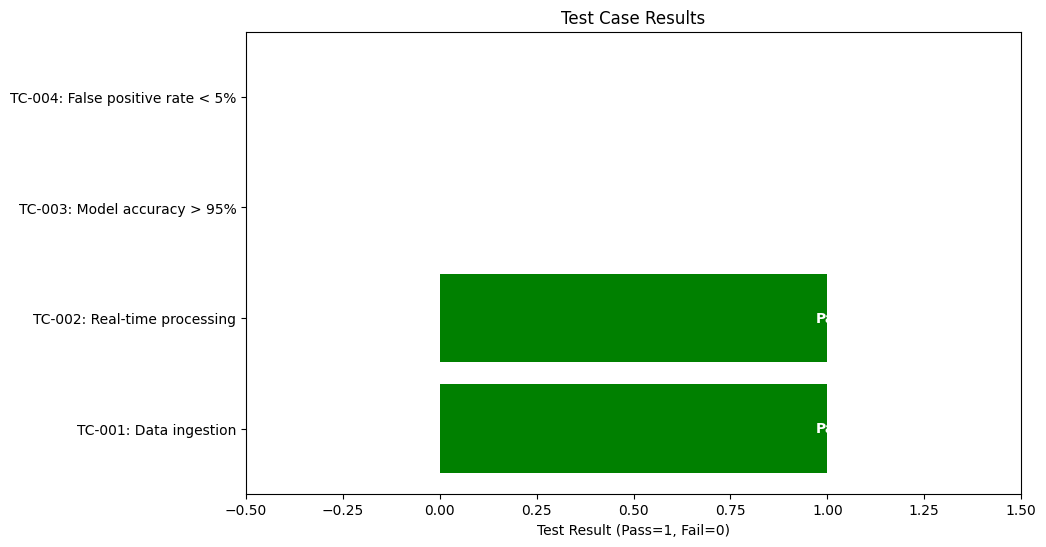

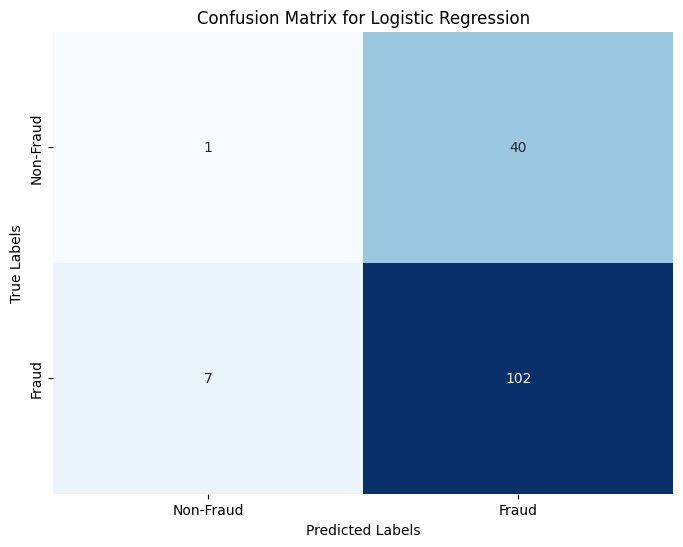

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
try:
    data = pd.read_csv('/content/Fraud transaction.csv')
    print("TC-001: Data ingestion - Pass")
except Exception as e:
    print("TC-001: Data ingestion - Fail")
    print(f"Error: {e}")

# Dropping ID column if it exists
data = data.drop(columns=['id'], errors='ignore')

# Define features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the model
log_reg_model = LogisticRegression(max_iter=10000, random_state=42)

# Test Case TC-002: Verify processing time (simulating real-time processing)
start_time = time.time()
log_reg_model.fit(X_train, y_train)
end_time = time.time()
processing_time = end_time - start_time

if processing_time < 1:
    print("TC-002: Real-time processing - Pass")
else:
    print("TC-002: Real-time processing - Fail")

# Predictions and model evaluation
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Test Case TC-003: Model accuracy threshold
if accuracy > 0.95:
    print("TC-003: Fraud detection model accuracy - Pass")
else:
    print("TC-003: Fraud detection model accuracy - Fail")

# Test Case TC-004: False positive rate threshold
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()  # Extract values from the confusion matrix
false_positive_rate = fp / (fp + tn)

if false_positive_rate < 0.05:
    print("TC-004: False positive rate - Pass")
else:
    print("TC-004: False positive rate - Fail")

# Print additional results for verification
print("\nModel Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", conf_matrix)
print("False Positive Rate:", false_positive_rate)

# Visualize test results
test_results = {
    'TC-001: Data ingestion': 'Pass' if not data.empty else 'Fail',
    'TC-002: Real-time processing': 'Pass' if processing_time < 1 else 'Fail',
    'TC-003: Model accuracy > 95%': 'Pass' if accuracy > 0.95 else 'Fail',
    'TC-004: False positive rate < 5%': 'Pass' if false_positive_rate < 0.05 else 'Fail'
}

labels = list(test_results.keys())
results = [1 if result == 'Pass' else 0 for result in test_results.values()]
colors = ['green' if result == 1 else 'red' for result in results]

plt.figure(figsize=(10, 6))
plt.barh(labels, results, color=colors)
plt.xlabel("Test Result (Pass=1, Fail=0)")
plt.title("Test Case Results")
for i, v in enumerate(results):
    plt.text(v - 0.03, i, "Pass" if v == 1 else "Fail", color="white", va="center", fontweight="bold")
plt.xlim(-0.5, 1.5)
plt.show()

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()



KNN

TC-001: Data ingestion - Pass
TC-002: Real-time processing - Pass
TC-003: Fraud detection model accuracy - Fail
TC-004: False positive rate - Fail

Model Accuracy: 0.7133333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.15      0.22        41
           1       0.74      0.93      0.82       109

    accuracy                           0.71       150
   macro avg       0.59      0.54      0.52       150
weighted avg       0.66      0.71      0.66       150

Confusion Matrix:
 [[  6  35]
 [  8 101]]
False Positive Rate: 0.8536585365853658


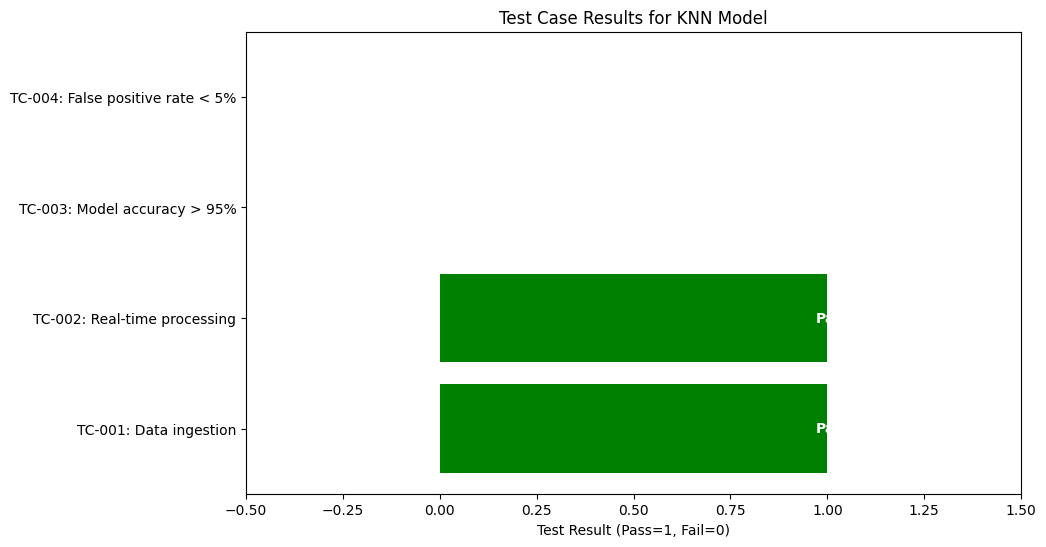

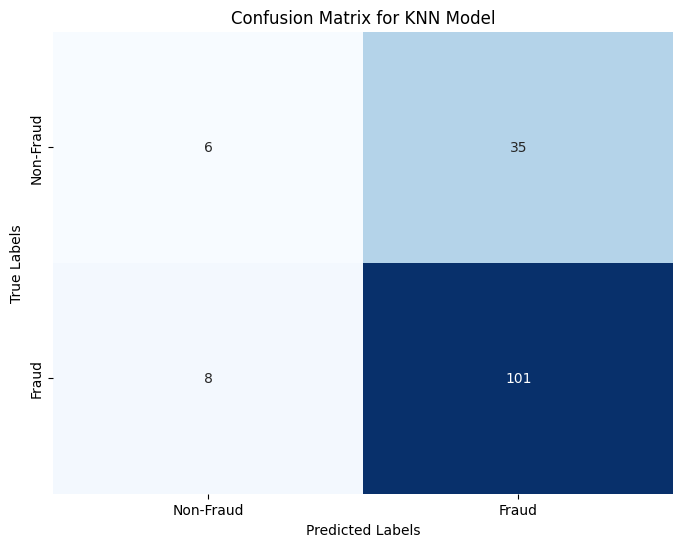

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
try:
    data = pd.read_csv('/content/Fraud transaction.csv')
    print("TC-001: Data ingestion - Pass")
except Exception as e:
    print("TC-001: Data ingestion - Fail")
    print(f"Error: {e}")

# Dropping ID column if it exists
data = data.drop(columns=['id'], errors='ignore')

# Define features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Test Case TC-002: Verify processing time (simulating real-time processing)
start_time = time.time()
knn_model.fit(X_train, y_train)
end_time = time.time()
processing_time = end_time - start_time

if processing_time < 1:
    print("TC-002: Real-time processing - Pass")
else:
    print("TC-002: Real-time processing - Fail")

# Predictions and model evaluation
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Test Case TC-003: Model accuracy threshold
if accuracy > 0.95:
    print("TC-003: Fraud detection model accuracy - Pass")
else:
    print("TC-003: Fraud detection model accuracy - Fail")

# Test Case TC-004: False positive rate threshold
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
false_positive_rate = fp / (fp + tn)

if false_positive_rate < 0.05:
    print("TC-004: False positive rate - Pass")
else:
    print("TC-004: False positive rate - Fail")

# Print additional results for verification
print("\nModel Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", conf_matrix)
print("False Positive Rate:", false_positive_rate)

# Visualize test results with a bar chart
test_results = {
    'TC-001: Data ingestion': 'Pass' if not data.empty else 'Fail',
    'TC-002: Real-time processing': 'Pass' if processing_time < 1 else 'Fail',
    'TC-003: Model accuracy > 95%': 'Pass' if accuracy > 0.95 else 'Fail',
    'TC-004: False positive rate < 5%': 'Pass' if false_positive_rate < 0.05 else 'Fail'
}

labels = list(test_results.keys())
results = [1 if result == 'Pass' else 0 for result in test_results.values()]
colors = ['green' if result == 1 else 'red' for result in results]

plt.figure(figsize=(10, 6))
plt.barh(labels, results, color=colors)
plt.xlabel("Test Result (Pass=1, Fail=0)")
plt.title("Test Case Results for KNN Model")
for i, v in enumerate(results):
    plt.text(v - 0.03, i, "Pass" if v == 1 else "Fail", color="white", va="center", fontweight="bold")
plt.xlim(-0.5, 1.5)
plt.show()

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for KNN Model")
plt.show()


Random forest

TC-001: Data ingestion - Pass
TC-002: Real-time processing - Pass
TC-003: Fraud detection model accuracy - Fail
TC-004: False positive rate - Fail

Model Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.07      0.12        41
           1       0.73      0.94      0.82       109

    accuracy                           0.70       150
   macro avg       0.51      0.50      0.47       150
weighted avg       0.61      0.70      0.63       150

Confusion Matrix:
 [[  3  38]
 [  7 102]]
False Positive Rate: 0.926829268292683


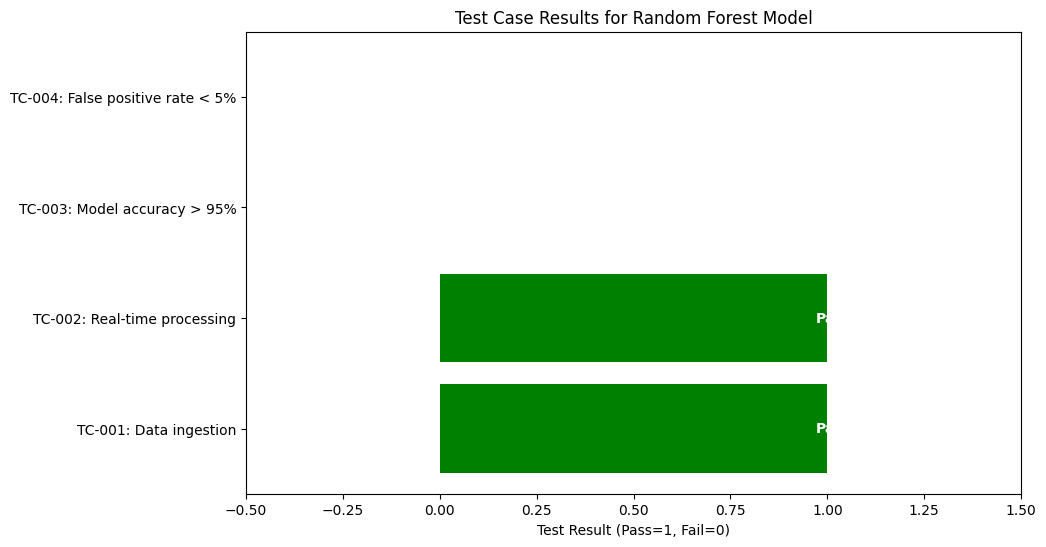

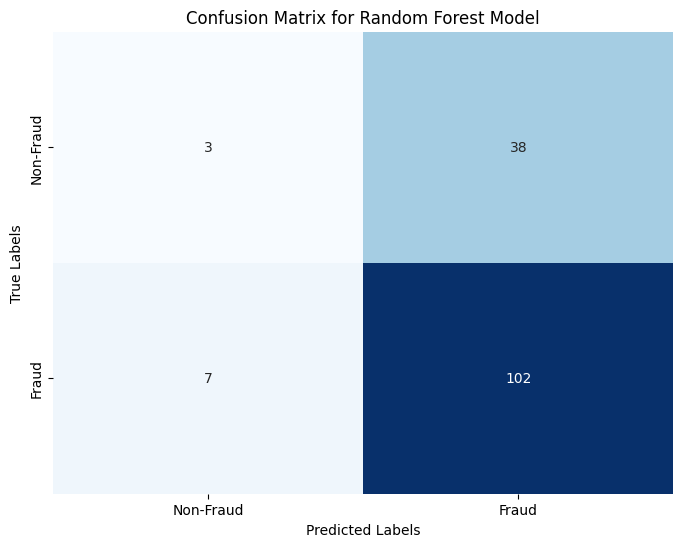

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
try:
    data = pd.read_csv('/content/Fraud transaction.csv')
    print("TC-001: Data ingestion - Pass")
except Exception as e:
    print("TC-001: Data ingestion - Fail")
    print(f"Error: {e}")

# Dropping ID column if it exists
data = data.drop(columns=['id'], errors='ignore')

# Define features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Test Case TC-002: Verify processing time (simulating real-time processing)
start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
processing_time = end_time - start_time

if processing_time < 1:
    print("TC-002: Real-time processing - Pass")
else:
    print("TC-002: Real-time processing - Fail")

# Predictions and model evaluation
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Test Case TC-003: Model accuracy threshold
if accuracy > 0.95:
    print("TC-003: Fraud detection model accuracy - Pass")
else:
    print("TC-003: Fraud detection model accuracy - Fail")

# Test Case TC-004: False positive rate threshold
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
false_positive_rate = fp / (fp + tn)

if false_positive_rate < 0.05:
    print("TC-004: False positive rate - Pass")
else:
    print("TC-004: False positive rate - Fail")

# Print additional results for verification
print("\nModel Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", conf_matrix)
print("False Positive Rate:", false_positive_rate)

# Visualize test results with a bar chart
test_results = {
    'TC-001: Data ingestion': 'Pass' if not data.empty else 'Fail',
    'TC-002: Real-time processing': 'Pass' if processing_time < 1 else 'Fail',
    'TC-003: Model accuracy > 95%': 'Pass' if accuracy > 0.95 else 'Fail',
    'TC-004: False positive rate < 5%': 'Pass' if false_positive_rate < 0.05 else 'Fail'
}

labels = list(test_results.keys())
results = [1 if result == 'Pass' else 0 for result in test_results.values()]
colors = ['green' if result == 1 else 'red' for result in results]

plt.figure(figsize=(10, 6))
plt.barh(labels, results, color=colors)
plt.xlabel("Test Result (Pass=1, Fail=0)")
plt.title("Test Case Results for Random Forest Model")
for i, v in enumerate(results):
    plt.text(v - 0.03, i, "Pass" if v == 1 else "Fail", color="white", va="center", fontweight="bold")
plt.xlim(-0.5, 1.5)
plt.show()

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()


Decision tree

TC-001: Data ingestion - Pass
TC-002: Real-time processing - Pass
TC-003: Fraud detection model accuracy - Fail
TC-004: False positive rate - Fail

Model Accuracy: 0.5933333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.27      0.29      0.28        41
           1       0.73      0.71      0.72       109

    accuracy                           0.59       150
   macro avg       0.50      0.50      0.50       150
weighted avg       0.60      0.59      0.60       150

Confusion Matrix:
 [[12 29]
 [32 77]]
False Positive Rate: 0.7073170731707317


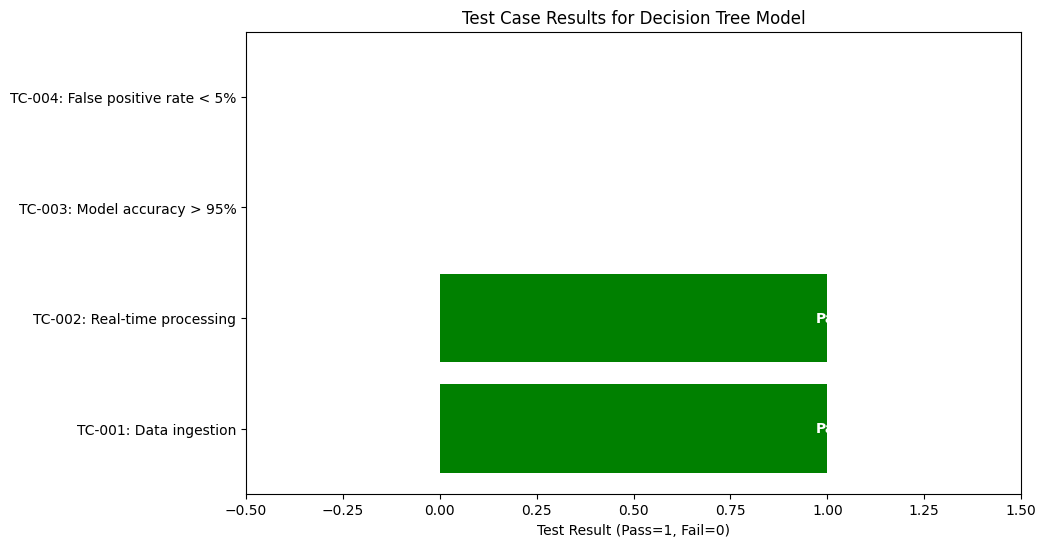

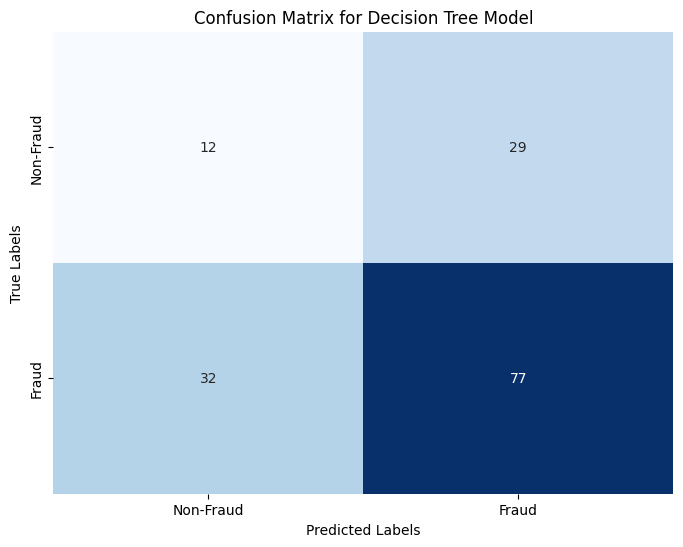

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
try:
    data = pd.read_csv('/content/Fraud transaction.csv')
    print("TC-001: Data ingestion - Pass")
except Exception as e:
    print("TC-001: Data ingestion - Fail")
    print(f"Error: {e}")

# Dropping ID column if it exists
data = data.drop(columns=['id'], errors='ignore')

# Define features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Test Case TC-002: Verify processing time (simulating real-time processing)
start_time = time.time()
dt_model.fit(X_train, y_train)
end_time = time.time()
processing_time = end_time - start_time

if processing_time < 1:
    print("TC-002: Real-time processing - Pass")
else:
    print("TC-002: Real-time processing - Fail")

# Predictions and model evaluation
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Test Case TC-003: Model accuracy threshold
if accuracy > 0.95:
    print("TC-003: Fraud detection model accuracy - Pass")
else:
    print("TC-003: Fraud detection model accuracy - Fail")

# Test Case TC-004: False positive rate threshold
conf_matrix = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
false_positive_rate = fp / (fp + tn)

if false_positive_rate < 0.05:
    print("TC-004: False positive rate - Pass")
else:
    print("TC-004: False positive rate - Fail")

# Print additional results for verification
print("\nModel Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", conf_matrix)
print("False Positive Rate:", false_positive_rate)

# Visualize test results with a bar chart
test_results = {
    'TC-001: Data ingestion': 'Pass' if not data.empty else 'Fail',
    'TC-002: Real-time processing': 'Pass' if processing_time < 1 else 'Fail',
    'TC-003: Model accuracy > 95%': 'Pass' if accuracy > 0.95 else 'Fail',
    'TC-004: False positive rate < 5%': 'Pass' if false_positive_rate < 0.05 else 'Fail'
}

labels = list(test_results.keys())
results = [1 if result == 'Pass' else 0 for result in test_results.values()]
colors = ['green' if result == 1 else 'red' for result in results]

plt.figure(figsize=(10, 6))
plt.barh(labels, results, color=colors)
plt.xlabel("Test Result (Pass=1, Fail=0)")
plt.title("Test Case Results for Decision Tree Model")
for i, v in enumerate(results):
    plt.text(v - 0.03, i, "Pass" if v == 1 else "Fail", color="white", va="center", fontweight="bold")
plt.xlim(-0.5, 1.5)
plt.show()

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Decision Tree Model")
plt.show()


TC-001: Data ingestion - Pass

Evaluating Logistic Regression

Evaluating K-Nearest Neighbors

Evaluating Random Forest

Evaluating Decision Tree


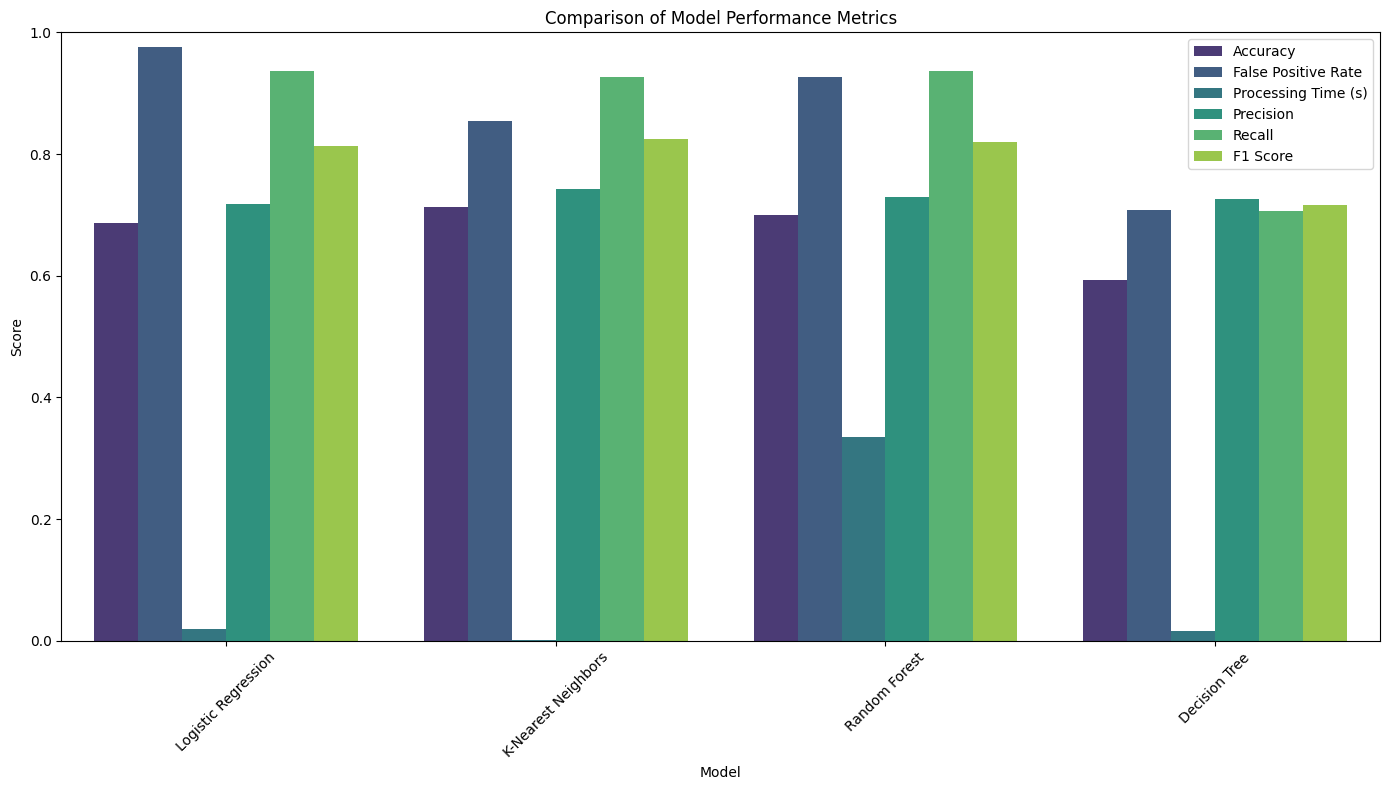

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Load and preprocess the data
try:
    data = pd.read_csv('/content/Fraud transaction.csv')
    print("TC-001: Data ingestion - Pass")
except Exception as e:
    print("TC-001: Data ingestion - Fail")
    print(f"Error: {e}")

# Dropping ID column if it exists
data = data.drop(columns=['id'], errors='ignore')

# Define features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Metrics dictionary to store evaluation results for each model
metrics = {
    "Model": [],
    "Accuracy": [],
    "False Positive Rate": [],
    "Processing Time (s)": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

# Evaluate each model and store metrics
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}")

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    processing_time = end_time - start_time

    # Predictions and metrics
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    false_positive_rate = fp / (fp + tn)

    # Append metrics to dictionary
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["False Positive Rate"].append(false_positive_rate)
    metrics["Processing Time (s)"].append(processing_time)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame for grouped bar plotting
metrics_melted = metrics_df.melt(id_vars="Model",
                                 value_vars=["Accuracy", "False Positive Rate", "Processing Time (s)",
                                             "Precision", "Recall", "F1 Score"],
                                 var_name="Metric",
                                 value_name="Score")

# Plot all metrics in a single grouped bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x="Model", y="Score", hue="Metric", data=metrics_melted, palette="viridis")
plt.title("Comparison of Model Performance Metrics")
plt.ylim(0, 1)  # Adjust this if processing time is much larger than 1
plt.xticks(rotation=45)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()
